# Multilayer Perceptron Classifier

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import statistics
import random as r

from sklearn.preprocessing import StandardScaler

from collections import Counter
from imblearn.over_sampling import RandomOverSampler

from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, BatchNormalization, Conv1D, Conv2D, Flatten, MaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

import pydotplus

### Find the Best Parameters for Overall Accuracy

In [2]:
df = pd.read_csv('data/segmented_data/mlp_optimization.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [3]:
df = df.sort_values(by='test_accuracy', ascending=False)

In [4]:
df.head()

hidden_layers  dimensions_per_layer hidden_layer_activation  \
113              6                    60                    relu   
239             12                    60                    relu   
49               1                    60                    relu   
205              6                    60                    selu   
244             12                    60                    relu   

    output_layer_activation        loss_function optimizer  epochs  \
113                 sigmoid  binary_crossentropy      adam     175   
239                 sigmoid  binary_crossentropy     nadam     175   
49                  sigmoid   mean_squared_error     nadam     175   
205                 sigmoid   mean_squared_error    adamax     250   
244                 sigmoid   mean_squared_error      adam     100   

     batch_size  test_accuracy  precision    recall  f1_score  
113         100       0.732767   0.632124  0.472486  0.539148  
239         100       0.729996   0.648766  0.413007  0.498564  
49           50       0.729053   0.668865  0.355687  0.462703  
205          50       0.727350   0.655835  0.408171  0.490724  
244          50       0.724985   0.612649  0.461207  0.524925

In [5]:
class best_accuracy:
    hidden_layers = df.iloc[0, 0]
    dimensions_per_layer = df.iloc[0, 1]
    hidden_layer_activation = df.iloc[0, 2]
    output_layer_activation = df.iloc[0, 3]
    loss_function = df.iloc[0, 4]
    optimizer = df.iloc[0, 5]
    epochs = df.iloc[0, 6]
    batch_size = df.iloc[0, 7]

### Find the Best Parameters for Bellwether Precision

In [6]:
df = df.sort_values(by='precision', ascending=False)

In [7]:
df.head()

hidden_layers  dimensions_per_layer hidden_layer_activation  \
9               1                    60                    relu   
94              1                    60                    selu   
49              1                    60                    relu   
74              1                    60                    selu   
10              1                    60                    relu   

   output_layer_activation        loss_function optimizer  epochs  batch_size  \
9                  sigmoid  binary_crossentropy    adamax     100          10   
94                 sigmoid   mean_squared_error    adamax     175          50   
49                 sigmoid   mean_squared_error     nadam     175          50   
74                 sigmoid  binary_crossentropy     nadam     100         100   
10                 sigmoid  binary_crossentropy    adamax     100          50   

    test_accuracy  precision    recall  f1_score  
9        0.717154   0.688019  0.283488  0.394354  
94       0.711036   0.669548  0.279288  0.391726  
49       0.729053   0.668865  0.355687  0.462703  
74       0.712161   0.662015  0.273294  0.385358  
10       0.680236   0.657780  0.113233  0.185264

In [8]:
class best_precision:
    hidden_layers = df.iloc[0, 0]
    dimensions_per_layer = df.iloc[0, 1]
    hidden_layer_activation = df.iloc[0, 2]
    output_layer_activation = df.iloc[0, 3]
    loss_function = df.iloc[0, 4]
    optimizer = df.iloc[0, 5]
    epochs = df.iloc[0, 6]
    batch_size = df.iloc[0, 7]

### Find the Best Parameters for Bellwether Recall

In [9]:
df = df.sort_values(by='recall', ascending=False)

In [10]:
df.head()

hidden_layers  dimensions_per_layer hidden_layer_activation  \
113              6                    60                    relu   
244             12                    60                    relu   
158              6                    60                    relu   
288             12                    60                    selu   
226             12                    60                    relu   

    output_layer_activation        loss_function optimizer  epochs  \
113                 sigmoid  binary_crossentropy      adam     175   
244                 sigmoid   mean_squared_error      adam     100   
158                 sigmoid   mean_squared_error     nadam     175   
288                 sigmoid  binary_crossentropy     nadam     100   
226                 sigmoid  binary_crossentropy    adamax     100   

     batch_size  test_accuracy  precision    recall  f1_score  
113         100       0.732767   0.632124  0.472486  0.539148  
244          50       0.724985   0.612649  0.461207  0.524925  
158         100       0.680463   0.541295  0.453856  0.470474  
288          10       0.716086   0.579050  0.450889  0.491061  
226          50       0.717320   0.598309  0.441297  0.503776

In [11]:
class best_recall:
    hidden_layers = df.iloc[0, 0]
    dimensions_per_layer = df.iloc[0, 1]
    hidden_layer_activation = df.iloc[0, 2]
    output_layer_activation = df.iloc[0, 3]
    loss_function = df.iloc[0, 4]
    optimizer = df.iloc[0, 5]
    epochs = df.iloc[0, 6]
    batch_size = df.iloc[0, 7]

### Find the Best Parameters for Bellwether f1-score

In [12]:
df = df.sort_values(by='f1_score', ascending=False)

In [13]:
df.head()

hidden_layers  dimensions_per_layer hidden_layer_activation  \
113              6                    60                    relu   
244             12                    60                    relu   
226             12                    60                    relu   
239             12                    60                    relu   
160              6                    60                    relu   

    output_layer_activation        loss_function optimizer  epochs  \
113                 sigmoid  binary_crossentropy      adam     175   
244                 sigmoid   mean_squared_error      adam     100   
226                 sigmoid  binary_crossentropy    adamax     100   
239                 sigmoid  binary_crossentropy     nadam     175   
160                 sigmoid   mean_squared_error     nadam     250   

     batch_size  test_accuracy  precision    recall  f1_score  
113         100       0.732767   0.632124  0.472486  0.539148  
244          50       0.724985   0.612649  0.461207  0.524925  
226          50       0.717320   0.598309  0.441297  0.503776  
239         100       0.729996   0.648766  0.413007  0.498564  
160          50       0.709333   0.580448  0.436838  0.496245

In [14]:
class best_f1_score:
    hidden_layers = df.iloc[0, 0]
    dimensions_per_layer = df.iloc[0, 1]
    hidden_layer_activation = df.iloc[0, 2]
    output_layer_activation = df.iloc[0, 3]
    loss_function = df.iloc[0, 4]
    optimizer = df.iloc[0, 5]
    epochs = df.iloc[0, 6]
    batch_size = df.iloc[0, 7]

## Test the Model

In [54]:
# Create a new function that appends bellwether status to a df

def create_label(data):
    data['bellwether'] = ''
    for i, v in enumerate(data.wins):
        if v > 4:
            data.iloc[i, -1] = 1
        elif v <= 4:
            data.iloc[i, -1] = 0

In [55]:
# Create train set (60%)

X_train = pd.read_csv('data/segmented_data/training_data.csv')
X_train = X_train.drop(['Unnamed: 0', 'Unnamed: 0.1', 'fips', 'state', 'county', 'wins'], axis=1)

y_train = pd.read_csv('data/segmented_data/training_data.csv')
create_label(y_train)
y_train = y_train.bellwether

In [56]:
# Create validation set (20%)

val_set = pd.read_csv('data/segmented_data/validation_data.csv')
create_label(val_set)

X_val = np.array(val_set.drop(['Unnamed: 0', 'Unnamed: 0.1', 'fips', 'state', 'county', 'wins', 'bellwether'], axis=1))
X_val = X_val.astype('float32')
y_val = np.array(val_set.bellwether).astype('float32')
y_val = y_val.astype('float32')

val_set = (X_val, y_val)

In [57]:
# Create test set (20%)

X_test = pd.read_csv('data/segmented_data/test_data.csv')
X_test = X_test.drop(['Unnamed: 0', 'Unnamed: 0.1', 'fips', 'state', 'county', 'wins'], axis=1)

y_test = pd.read_csv('data/segmented_data/test_data.csv')
create_label(y_test)
y_test = y_test.bellwether

In [58]:
# Standardize the inputs

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

val_set = (X_val, y_val)

In [59]:
# Convert integers to floats

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [60]:
# Balance train and test sets using oversampling (2:1 ratio)

oversample = RandomOverSampler(sampling_strategy=0.5)
X_new_train, y_new_train = oversample.fit_resample(X_train, y_train)
X_new_val, y_new_val = oversample.fit_resample(X_val, y_val)
X_new_test, y_new_test = oversample.fit_resample(X_test, y_test)

X_train, y_train, X_val, y_val, X_test, y_test = X_new_train, y_new_train, X_new_val, y_new_val, X_new_test, y_new_test
val_set = (X_val, y_val)

In [61]:
# Define the model

def run_model(runs, layers, dim, hl_act, ol_act, lf, opt, e, b):
    
    # define inner variables to be appended
    test_accuracy = []
    precision_0 = []
    recall_0 = []
    f1_score_0 = []
    support_0 = []
    precision_1 = []
    recall_1 = []
    f1_score_1 = []
    support_1 = []

    # get the average of # runs
    for i in range(runs):
        
        # define a fully connected feedforward keras model
        model = Sequential()
        model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation=hl_act))
        for x in range(layers):
            model.add(Dense(dim, activation=hl_act))
        model.add(Dense(1, activation=ol_act))

        # compile the keras model
        model.compile(loss=lf, optimizer=opt, metrics=['accuracy'])

        # fit the keras model on the dataset
        model.fit(X_train, y_train, epochs=e, batch_size=b, verbose=0, validation_data=val_set)

        # evaluate the keras model
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Run {}/{}: {}'.format(i+1, runs, accuracy))

        y_pred_class = model.predict(X_train)
        y_pred_class = np.where(y_pred_class > .5, 1, 0)
        training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
        training_error = 1 - training_accuracy

        y_pred_class = model.predict(X_test)
        y_pred_class = np.where(y_pred_class > .5, 1, 0)
        testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
        testing_error = 1 - testing_accuracy

        report = classification_report(pd.DataFrame(y_test, columns=['bellwether']).values, y_pred_class, output_dict=True)
        matrix = metrics.confusion_matrix(y_test, y_pred_class)

        # append the data
        test_accuracy.append(accuracy)
        precision_0.append(report['0.0']['precision'])
        recall_0.append(report['0.0']['recall'])
        f1_score_0.append(report['0.0']['f1-score'])
        support_0.append(report['0.0']['support'])
        precision_1.append(report['1.0']['precision'])
        recall_1.append(report['1.0']['recall'])
        f1_score_1.append(report['1.0']['f1-score'])
        support_1.append(report['1.0']['support'])

    print('\nResults\nAccuracy: {}, {}'.format(statistics.mean(test_accuracy), statistics.stdev(test_accuracy)))
    print('Precicion (0): {}, {}\nRecall (0): {}, {}\nF1-Score (0): {}, {}\nSupport (0): {}, {}'.format( 
        statistics.mean(precision_0), statistics.stdev(precision_0), 
        statistics.mean(recall_0), statistics.stdev(recall_0), 
        statistics.mean(f1_score_0), statistics.stdev(f1_score_0),
        statistics.mean(support_0), statistics.stdev(support_0)))
    print('Precicion (1): {}, {}\nRecall (1): {}, {}\nF1-Score (1): {}, {}\nSupport (1): {}, {}'.format( 
        statistics.mean(precision_1), statistics.stdev(precision_1), 
        statistics.mean(recall_1), statistics.stdev(recall_1), 
        statistics.mean(f1_score_1), statistics.stdev(f1_score_1),
        statistics.mean(support_1), statistics.stdev(support_1)))

In [62]:
run_model(30, best_accuracy.hidden_layers, best_accuracy.dimensions_per_layer, best_accuracy.hidden_layer_activation, 
         best_accuracy.output_layer_activation, best_accuracy.loss_function, best_accuracy.optimizer, best_accuracy.epochs,
         best_accuracy.batch_size)

Run 1/30: 0.6499999761581421
Run 2/30: 0.7055555582046509
Run 3/30: 0.6833333373069763
Run 4/30: 0.6277777552604675
Run 5/30: 0.6888889074325562
Run 6/30: 0.7555555701255798
Run 7/30: 0.6722221970558167
Run 8/30: 0.699999988079071
Run 9/30: 0.6722221970558167
Run 10/30: 0.6944444179534912
Run 11/30: 0.6833333373069763
Run 12/30: 0.6888889074325562
Run 13/30: 0.6666666865348816
Run 14/30: 0.644444465637207
Run 15/30: 0.6722221970558167
Run 16/30: 0.6944444179534912
Run 17/30: 0.6833333373069763
Run 18/30: 0.6499999761581421
Run 19/30: 0.6555555462837219
Run 20/30: 0.6222222447395325
Run 21/30: 0.6722221970558167
Run 22/30: 0.6777777671813965
Run 23/30: 0.6333333253860474
Run 24/30: 0.644444465637207
Run 25/30: 0.6666666865348816
Run 26/30: 0.6277777552604675
Run 27/30: 0.6333333253860474
Run 28/30: 0.6555555462837219
Run 29/30: 0.6722221970558167
Run 30/30: 0.699999988079071

Results
Accuracy: 0.6698148091634114, 0.028763483060505985
Precicion (0): 0.7026058285705621, 0.0212489226353537

## Run the Model on NonPolar

In [63]:
data = pd.read_csv('data/compiled_data/Nonpolar.csv')

In [64]:
data.head()

Unnamed: 0  Unnamed: 0.1  fips    state     county  wins  \
0           0            12  1023  Alabama    Choctaw     2   
1           1            17  1033  Alabama    Colbert     2   
2           2            18  1035  Alabama    Conecuh     3   
3           3            36  1071  Alabama    Jackson     2   
4           4            37  1073  Alabama  Jefferson     4   

   poverty_rate_1960  poverty_rate_1970  poverty_rate_1980  poverty_rate_1990  \
0               62.1               42.1               31.5               30.2   
1               35.4               22.4               14.5               14.6   
2               63.7               45.0               29.4               29.7   
3               52.1               24.4               15.7               16.6   
4               30.9               18.8               15.3               16.0   

   ...  percent_black_male_2019  percent_black_female_2019  \
0  ...                18.825959                  22.916832   
1  ...                 7.436505                   8.781521   
2  ...                20.916549                  25.159526   
3  ...                 1.729749                   1.762678   
4  ...                19.823163                  23.643696   

   percent_native_american_male_2019  percent_native_american_female_2019  \
0                           0.127095                             0.079434   
1                           0.352999                             0.338517   
2                           0.298334                             0.256899   
3                           0.815481                             0.836788   
4                           0.139240                             0.143796   

   percent_asian_male_2019  percent_asian_female_2019  \
0                 0.055604                   0.142982   
1                 0.275158                   0.401875   
2                 0.091158                   0.140880   
3                 0.255685                   0.327354   
4                 0.850172                   0.939455   

   percent_hispanic_male_2019  percent_hispanic_female_2019  \
0                    0.436889                      0.579871   
1                    1.674481                      1.564056   
2                    1.243060                      1.052457   
3                    1.611591                      1.456630   
4                    2.163314                      1.917175   

   cumulative_confirmed_cases  cumulative_deaths  
0                      108088               4438  
1                      746845              11653  
2                      166637               3646  
3                      776358               7270  
4                     8499646             145397  

[5 rows x 173 columns]

In [65]:
# Create a new column that describes bellwether status

data['bellwether'] = ''
for i, v in enumerate(data.wins):
    if v > 4:
        data.iloc[i, -1] = 1
    elif v <= 4:
        data.iloc[i, -1] = 0

In [66]:
# Train/test split

X = data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'fips', 'state', 'county', 'wins', 'bellwether'], axis=1)
y = data.bellwether

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25,random_state=0)

In [67]:
# Standardize the inputs

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
# Convert integers to floats

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [69]:
print('X_train: {0}\nX_test: {1}\ny_train: {2}\ny_test: {3}'.format(X_train.shape, X_test.shape, len(y_train), len(y_test)))

X_train: (469, 167)
X_test: (157, 167)
y_train: 469
y_test: 157


In [70]:
# Balance train and test Sets using oversampling (2:1 ratio)

from collections import Counter
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.5)

X_train, y_train = oversample.fit_resample(X_train, y_train)
print('y_train: {0}'.format(Counter(y_train)))

X_test, y_test = oversample.fit_resample(X_test, y_test)
print('y_test: {0}'.format(Counter(y_test)))

y_train: Counter({0.0: 427, 1.0: 213})
y_test: Counter({0.0: 143, 1.0: 71})


In [71]:
# Define the model

def run_model(runs, layers, dim, hl_act, ol_act, lf, opt, e, b):
    
    # define inner variables to be appended
    test_accuracy = []
    precision_0 = []
    recall_0 = []
    f1_score_0 = []
    support_0 = []
    precision_1 = []
    recall_1 = []
    f1_score_1 = []
    support_1 = []

    # get the average of # runs
    for i in range(runs):
        
        # define a fully connected feedforward keras model
        model = Sequential()
        model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation=hl_act))
        for x in range(layers):
            model.add(Dense(dim, activation=hl_act))
        model.add(Dense(1, activation=ol_act))

        # compile the keras model
        model.compile(loss=lf, optimizer=opt, metrics=['accuracy'])

        # fit the keras model on the dataset
        model.fit(X_train, y_train, epochs=e, batch_size=b, verbose=0)

        # evaluate the keras model
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print('Run {}/{}: {}'.format(i+1, runs, accuracy))

        y_pred_class = model.predict(X_train)
        y_pred_class = np.where(y_pred_class > .5, 1, 0)
        training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
        training_error = 1 - training_accuracy

        y_pred_class = model.predict(X_test)
        y_pred_class = np.where(y_pred_class > .5, 1, 0)
        testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
        testing_error = 1 - testing_accuracy

        report = classification_report(pd.DataFrame(y_test, columns=['bellwether']).values, y_pred_class, output_dict=True)
        matrix = metrics.confusion_matrix(y_test, y_pred_class)

        # append the data
        test_accuracy.append(accuracy)
        precision_0.append(report['0.0']['precision'])
        recall_0.append(report['0.0']['recall'])
        f1_score_0.append(report['0.0']['f1-score'])
        support_0.append(report['0.0']['support'])
        precision_1.append(report['1.0']['precision'])
        recall_1.append(report['1.0']['recall'])
        f1_score_1.append(report['1.0']['f1-score'])
        support_1.append(report['1.0']['support'])

    print('\nResults\nAccuracy: {}, {}'.format(statistics.mean(test_accuracy), statistics.stdev(test_accuracy)))
    print('Precicion (0): {}, {}\nRecall (0): {}, {}\nF1-Score (0): {}, {}\nSupport (0): {}, {}'.format( 
        statistics.mean(precision_0), statistics.stdev(precision_0), 
        statistics.mean(recall_0), statistics.stdev(recall_0), 
        statistics.mean(f1_score_0), statistics.stdev(f1_score_0),
        statistics.mean(support_0), statistics.stdev(support_0)))
    print('Precicion (1): {}, {}\nRecall (1): {}, {}\nF1-Score (1): {}, {}\nSupport (1): {}, {}'.format( 
        statistics.mean(precision_1), statistics.stdev(precision_1), 
        statistics.mean(recall_1), statistics.stdev(recall_1), 
        statistics.mean(f1_score_1), statistics.stdev(f1_score_1),
        statistics.mean(support_1), statistics.stdev(support_1)))

In [72]:
run_model(10, best_accuracy.hidden_layers, best_accuracy.dimensions_per_layer, best_accuracy.hidden_layer_activation, 
         best_accuracy.output_layer_activation, best_accuracy.loss_function, best_accuracy.optimizer, best_accuracy.epochs,
         best_accuracy.batch_size)

Run 1/10: 0.6401869058609009
Run 2/10: 0.6542056202888489
Run 3/10: 0.6822429895401001
Run 4/10: 0.6308411359786987
Run 5/10: 0.6401869058609009
Run 6/10: 0.6355140209197998
Run 7/10: 0.6355140209197998
Run 8/10: 0.6308411359786987
Run 9/10: 0.672897219657898
Run 10/10: 0.677570104598999

Results
Accuracy: 0.6500000059604645, 0.020243231808081394
Precicion (0): 0.6734675897058127, 0.013388108251635169
Recall (0): 0.9251748251748252, 0.015826802048268505
F1-Score (0): 0.7794178061035584, 0.011757608013330681
Support (0): 143, 0.0
Precicion (1): 0.3660897581950213, 0.14105761533270558
Recall (1): 0.09577464788732394, 0.05303294364861198
F1-Score (1): 0.1506769113191114, 0.07859613667155274
Support (1): 71, 0.0


## Feature Analysis

In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasRegressor
from keras import optimizers

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Load the Data

In [44]:
# Load dataset
df = pd.read_csv('data/segmented_data/data_2000_2020.csv')

# Create a new column that describes bellwether status
df['bellwether'] = ''
for i, v in enumerate(df.wins):
    if v > 4:
        df.iloc[i, -1] = 1
    elif v <= 4:
        df.iloc[i, -1] = 0

In [45]:
# Create labels

x_label = list(df.columns[5:35])
y_label = ['bellwether']
df = df[y_label + x_label]
        
df.head()

bellwether  poverty_rate    population  persons_in_poverty  \
0          0     36.383333  24581.000000         8902.166667   
1          0     35.100000  16119.333333         5815.500000   
2          0     19.516667  51655.000000         9884.666667   
3          0     37.466667  15075.500000         5833.833333   
4          0     23.116667  46857.333333        10124.333333   

   rural_urban_code  urban_influence_code  metro  civilian_labor_force  \
0               6.0                   6.0    0.0               9845.20   
1               9.0                  10.0    0.0               5054.85   
2               3.0                   2.0    1.0              24517.90   
3               7.0                  11.0    0.0               4891.05   
4               6.0                   5.0    0.0              25334.00   

   employed  unemployed  ...  percent_black_male  percent_black_female  \
0   9039.75      805.45  ...           25.180116             22.500706   
1   4627.10      427.75  ...           19.637383             22.927498   
2  22760.80     1757.10  ...            7.431415              8.769940   
3   4439.30      451.75  ...           21.227098             25.178039   
4  23608.75     1725.25  ...            1.689644              1.766228   

   percent_native_american_male  percent_native_american_female  \
0                      0.377976                        0.268640   
1                      0.103233                        0.064972   
2                      0.310621                        0.299706   
3                      0.243664                        0.200267   
4                      0.782550                        0.812930   

   percent_asian_male  percent_asian_female  percent_hispanic_male  \
0            0.218840              0.220066               2.688941   
1            0.045841              0.096745               0.362755   
2            0.233118              0.324036               1.396695   
3            0.056918              0.123358               1.003296   
4            0.218962              0.283917               1.498113   

   percent_hispanic_female  cumulative_confirmed_cases  cumulative_deaths  
0                 2.099242                      298307               4787  
1                 0.408992                      108088               4438  
2                 1.226652                      746845              11653  
3                 0.753020                      166637               3646  
4                 1.293818                      776358               7270  

[5 rows x 31 columns]

In [46]:
df2 = pd.DataFrame()
df2['bellwether'] = df['bellwether']
df2['poverty_rate'] = df['poverty_rate']
df2['percent_no_diploma'] = df['percent_no_diploma']
df2['percent_diploma_only'] = df['percent_diploma_only']
df2['percent_completed_college/bachelor_degree'] = df['percent_completed_college/bachelor_degree']
df2['percent_white'] = df['percent_white_male'] + df['percent_white_female']
df2['percent_black'] = df['percent_black_male'] + df['percent_black_female']
df2['percent_hispanic'] = df['percent_hispanic_male'] + df['percent_hispanic_female']
df2['cumulative_confirmed_cases'] = df['cumulative_confirmed_cases']
df = df2

x_label = list(df.columns[1:])
y_label = ['bellwether']

df.head()

bellwether  poverty_rate  percent_no_diploma  percent_diploma_only  \
0          0     36.383333               46.12                 28.06   
1          0     35.100000               44.56                 31.28   
2          0     19.516667               35.52                 33.40   
3          0     37.466667               45.50                 33.74   
4          0     23.116667               43.22                 31.86   

   percent_completed_college/bachelor_degree  percent_white  percent_black  \
0                                       9.90      50.047419      47.680822   
1                                       7.94      56.546073      42.564880   
2                                      11.18      80.899502      16.201355   
3                                       6.90      51.775964      46.405138   
4                                       7.88      91.687401       3.455872   

   percent_hispanic  cumulative_confirmed_cases  
0          4.788184                      298307  
1          0.771747                      108088  
2          2.623347                      746845  
3          1.756316                      166637  
4          2.791931                      776358

In [47]:
# Convert entire dataset to floats
for i, v in enumerate(list(df.columns)):
    for a, b in enumerate(df[v]):
        df.iloc[a, i] = float(df.iloc[a, i])
        
# Check that every data point is a float
add = []
for i, v in enumerate(list(df.columns)):
    for a, b in enumerate(df[v]):
        if type(df.iloc[a, i]) == np.float64 or type(df.iloc[a, i]) == np.float:
            add.append(v)
len(add)

6372

In [48]:
# Split the data into test and training sets.
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(df[x_label], df[y_label], test_size=0.1)

# Print the dimensions
print('Training set dimensions X, y: ' + str(X_train.shape) + ' ' +str(y_train.shape))
print('Test set dimensions X, y: ' + str(X_test.shape) + ' '+ str(y_test.shape))

Training set dimensions X, y: (637, 8) (637, 1)
Test set dimensions X, y: (71, 8) (71, 1)


In [49]:
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

### Evaluate the Model

In [50]:
# define a fully connected feedforward keras model
model = Sequential()
model.add(Dense(X_over_train.shape[1], input_dim=X_over_train.shape[1], activation='relu'))
for i in range(6):
    model.add(Dense(X_over_train.shape[1]*2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(X_over_train, y_over_train, epochs=100, batch_size=100, validation_split=0.2, verbose=0)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


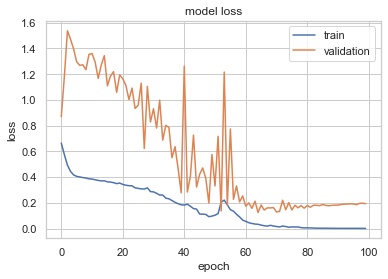

In [51]:
# summarize history loss
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_12 (Dense)             (None, 60)                1860      
_________________________________________________________________
dense_13 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_14 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_15 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_16 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_17 (Dense)             (None, 60)               

In [53]:
# Print accuracy, error, matrix, and classification report

y_pred_class = model.predict(X_over_train)
y_pred_class = np.where(y_pred_class > .5, 1, 0)
training_accuracy = metrics.accuracy_score(y_over_train, y_pred_class)
training_error = 1 - training_accuracy

y_pred_class = model.predict(X_over_test)
y_pred_class = np.where(y_pred_class > .5, 1, 0)
testing_accuracy = metrics.accuracy_score(y_over_test, y_pred_class)
testing_error = 1 - testing_accuracy

print('MLP accuracy: {0}\nTest error: {1}\n'.format(testing_accuracy, testing_error))
print('Confusion Matrix:\n[[TN  FP]\n[ FN  TP]]\n{0}\n'.format(metrics.confusion_matrix(y_over_test, y_pred_class)))

report = classification_report(y_over_test.values, y_pred_class, output_dict=True)
print('Classification Report:\n' + classification_report(y_over_test.values, y_pred_class))

MLP accuracy: 0.6862745098039216
Test error: 0.3137254901960784

Confusion Matrix:
[[TN  FP]
[ FN  TP]]
[[118  18]
 [ 46  22]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.87      0.79       136
         1.0       0.55      0.32      0.41        68

    accuracy                           0.69       204
   macro avg       0.63      0.60      0.60       204
weighted avg       0.66      0.69      0.66       204



### Multi-Class Visualization

In [54]:
# For multi-class visualization

In [55]:
X_train = pd.DataFrame(X_train, columns=x_label)
y_train = pd.DataFrame(y_train, columns=y_label)

In [ ]:
fitted = model.predict(X_train)

In [ ]:
fitted.shape

In [ ]:
# fix the dimensions of fitted

new = []
for i, v in enumerate(list(fitted)):
    new.append(v[0])
new = np.asarray(new)
fitted = new
fitted.shape

In [503]:
residuals = y_train[y_label[0]] - fitted

In [510]:
pd.DataFrame(fitted, columns=['Prediction'])

Prediction
0           1.0
1           0.0
2           0.0
3           0.0
4           0.0
..          ...
632         1.0
633         0.0
634         0.0
635         0.0
636         1.0

[637 rows x 1 columns]

In [516]:
pd.DataFrame(list(residuals), columns=['Residual'])

Residual
0        -1.0
1         0.0
2         0.0
3         1.0
4         1.0
..        ...
632      -1.0
633       0.0
634       0.0
635       1.0
636      -1.0

[637 rows x 1 columns]

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


(-1.0, 2.0)

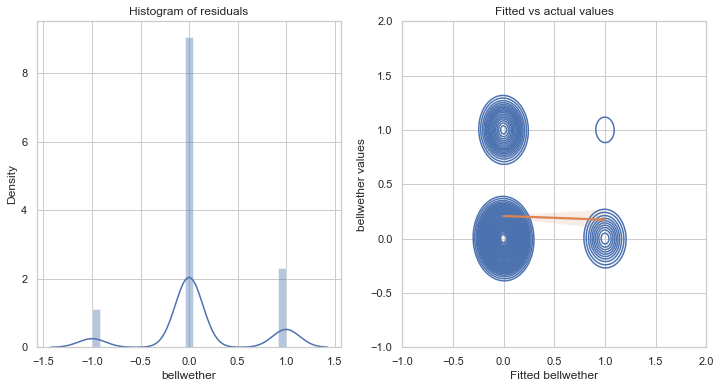

In [506]:
# Two plots
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,6))

# 1. Histogram of residuals
sns.distplot(residuals, ax=ax1)
ax1.set_title('Histogram of residuals')

# 2. Fitted vs residuals
x1 = pd.Series(fitted, name='Fitted bellwether')
x2 = pd.Series(y_train[y_label[0]], name="bellwether values")
sns.kdeplot(x1, x2, n_levels=40,ax = ax2)
sns.regplot(x=x1,y=x2, scatter=False, ax = ax2)
ax2.set_title('Fitted vs actual values')
ax2.set_xlim([-1,2])
ax2.set_ylim([-1,2])

### Permutation Importance

In [71]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

In [72]:
perm = PermutationImportance(model, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000022AC3E2C700> does not.

In [73]:
model.score

AttributeError: 'Sequential' object has no attribute 'score'

### SHAP Importance

In [75]:
import shap

In [389]:
# SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.
def f_wrapper(X):
    return model.predict(X).flatten()

# Too many input data - use a random slice
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 20)

# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,X_train_summary)

# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
shap_values  = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train) # using y_label as wins

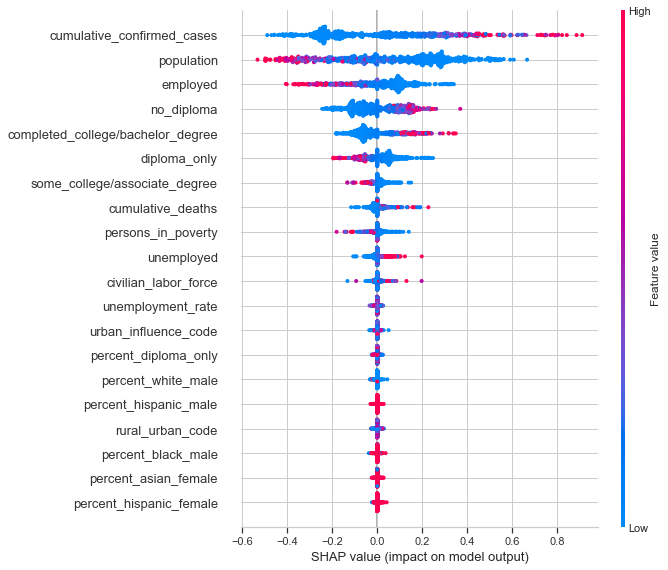

In [507]:
# SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.
def f_wrapper(X):
    return model.predict(X).flatten()

# Too many input data - use a random slice
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 20)

# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,X_train_summary)

# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
shap_values  = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train) # using y_label as bellwethers

In [76]:
# SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.
def f_wrapper(X):
    return model.predict(X).flatten()

# Too many input data - use a random slice
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 20)

# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,X_train_summary)

# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
shap_values  = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train) # using 8 columns

Provided model function fails when applied to the provided data set.


ValueError: in user code:

    c:\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    c:\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    c:\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    c:\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 30 but received input with shape (None, 8)
